# Diamonds Dataset - Visualizing, Cleaning, Feature Engineering, Regression

### Imports

In [1]:
#Number manipulation
import numpy as np

#Data Manipulation
import pandas as pd

#Plotting Libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Some configuration settings
%matplotlib inline
pd.set_option("display.max_columns", 100)

### Getting the data

In [3]:
df = pd.read_csv("diamonds.csv", index_col=0)

### Exploring the Data

In [4]:
df.shape

(53940, 10)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


**Checking for any null values**

In [8]:
df.isna().any().any()

False

**Plotting histograms**

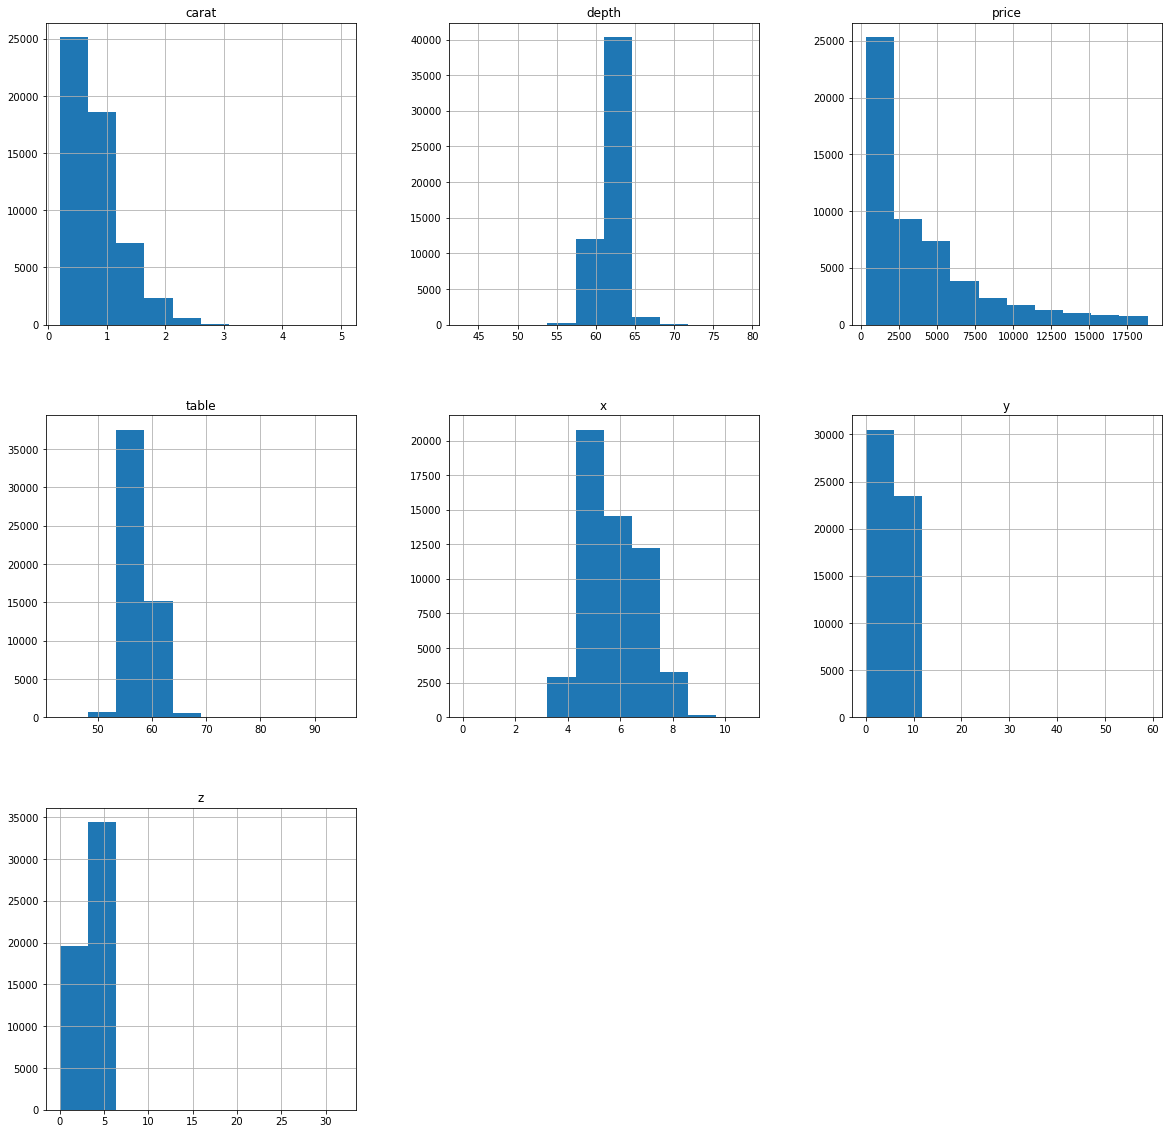

In [9]:
df.hist(figsize=(20, 20))
plt.show()

**Countplots for categorical variables**

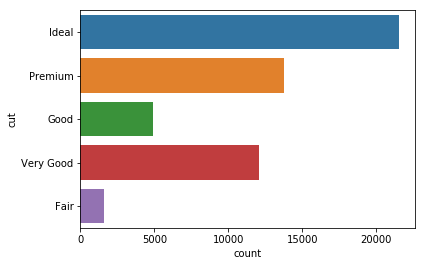

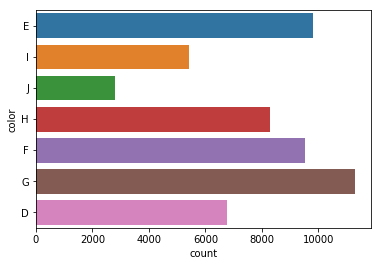

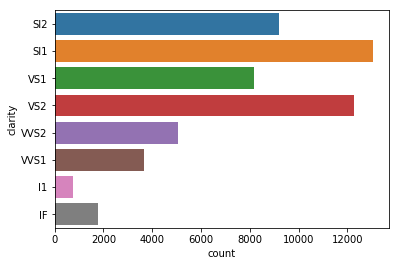

In [10]:
for feature in df.dtypes[df.dtypes == object].index:
    sns.countplot(y= feature, data= df)
    plt.show()

**Box and Violin Plots for numerical features**

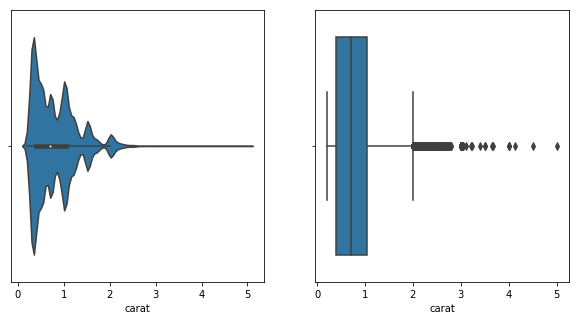

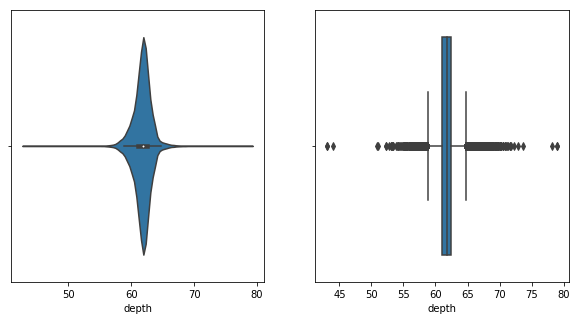

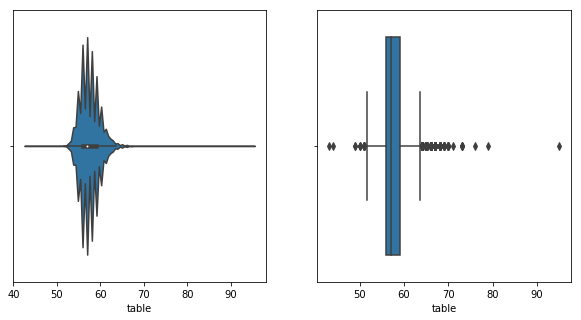

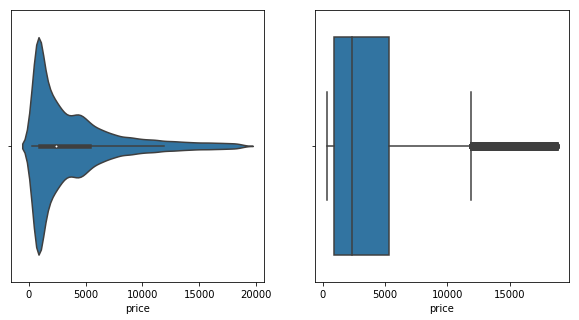

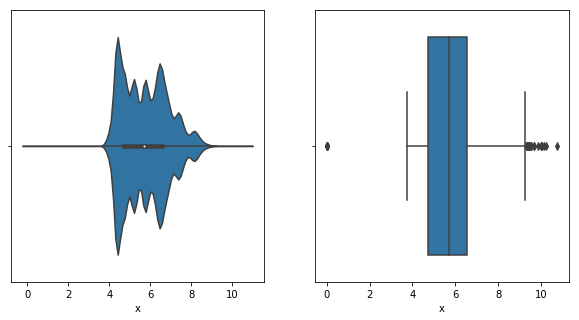

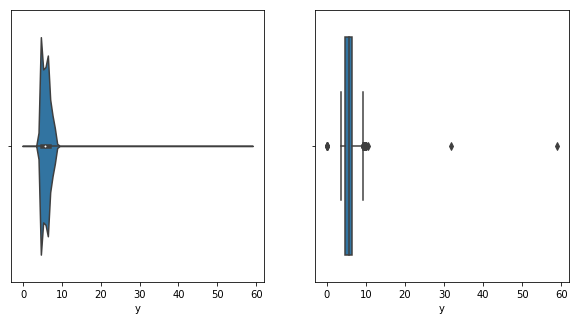

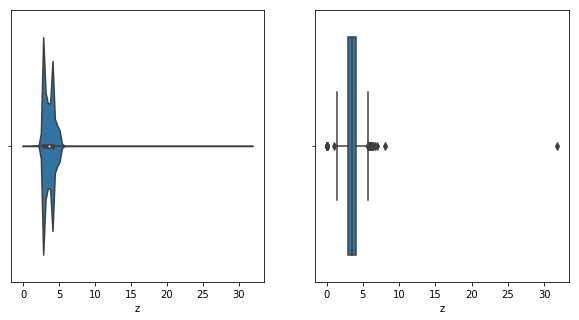

In [11]:
for feature in df.dtypes[df.dtypes != object].index:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.violinplot(x= feature, data= df)
    plt.subplot(1, 2, 2)
    sns.boxplot(x= feature, data= df)
    plt.show()

The box plots show that x, y, z have values that are 0, which shouldn't be possible.

Exploring this

In [12]:
pd.concat([df[df["x"] == 0], df[df["y"] == 0], df[df["z"] == 0]]).drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.0
26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.0
27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0


In [13]:
len(pd.concat([df[df["x"] == 0], df[df["y"] == 0], df[df["z"] == 0]]).drop_duplicates())

19

Considering the size of the dataset, it is just better to drop these values

In [14]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [15]:
df[df["z"] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


**Creating a feature, volume**

In [16]:
df["volume"] = df["x"] * df["y"] * df["z"]

**Creating a feature, density**

In [17]:
df["density"] = df["carat"]*0.2/df["volume"]

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.001204
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.001217
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.001208
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.001241
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.001194


### Grouping sparse classes

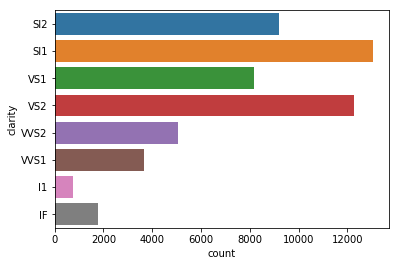

In [19]:
sns.countplot(y="clarity", data= df)

In [20]:
df.clarity.replace(["VVS1", "VVS2"], "VVS", inplace=True)
df.clarity.replace(["VS1", "VS2"], "VS", inplace= True)
df.clarity.replace(["SI1", "SI2"], "SI", inplace= True)
df.clarity.replace("I1", "I", inplace= True)

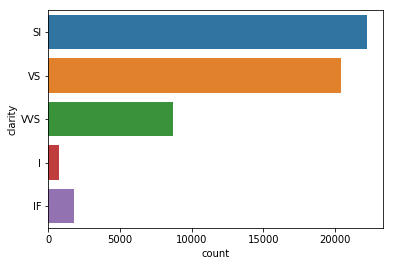

In [21]:
sns.countplot(y="clarity", data= df)

In [22]:
color_grades = {
    "Colorless": ["D", "E", "F"],
    "Near Colorless": ["G", "H", "I", "J"],
    "Faint Yellow": ["K", "L", "M"],
    "Very Light Yellow": ["N", "O", "P", "Q", "R"],
    "Light Yellow": ["S", "T", "U", "V", "W", "X", "Y", "Z"]
}

In [23]:
c_l = []
for color in df.color:
    for key, item in color_grades.items():
        if color in item:
            c_l.append(key)
            break
df["ColorGrade"] = c_l

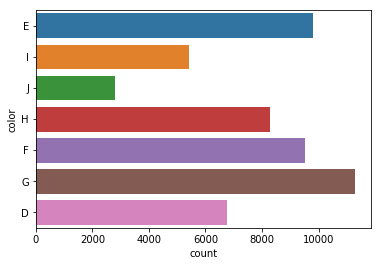

In [24]:
sns.countplot(y="color", data= df)

### Exploring multivariate distributions

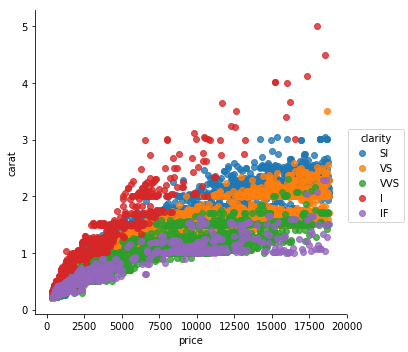

In [25]:
sns.lmplot(y="carat", x="price", hue="clarity", data= df, fit_reg= False)

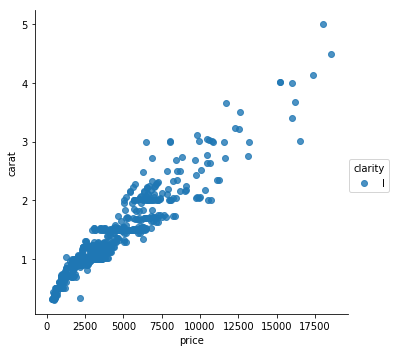

In [26]:
sns.lmplot(y="carat", x="price", hue="clarity", data= df[df.clarity == "I"], fit_reg= False)

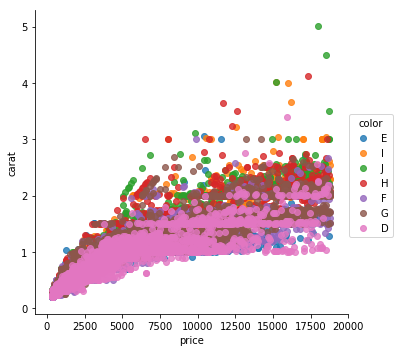

In [27]:
sns.lmplot(y="carat", x="price", hue="color", data= df, fit_reg= False)

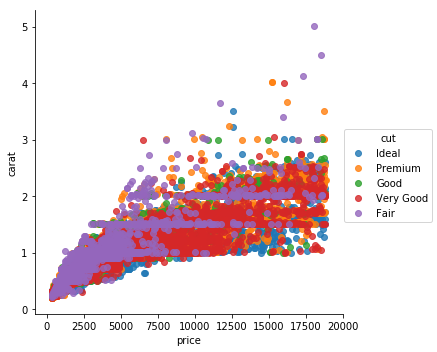

In [28]:
sns.lmplot(y="carat", x="price", hue="cut", data= df, fit_reg= False)

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,ColorGrade
1,0.23,Ideal,E,SI,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.001204,Colorless
2,0.21,Premium,E,SI,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.001217,Colorless
3,0.23,Good,E,VS,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.001208,Colorless
4,0.29,Premium,I,VS,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.001241,Near Colorless
5,0.31,Good,J,SI,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.001194,Near Colorless


### Correlations Matrix

In [30]:
new_df = pd.get_dummies(df)

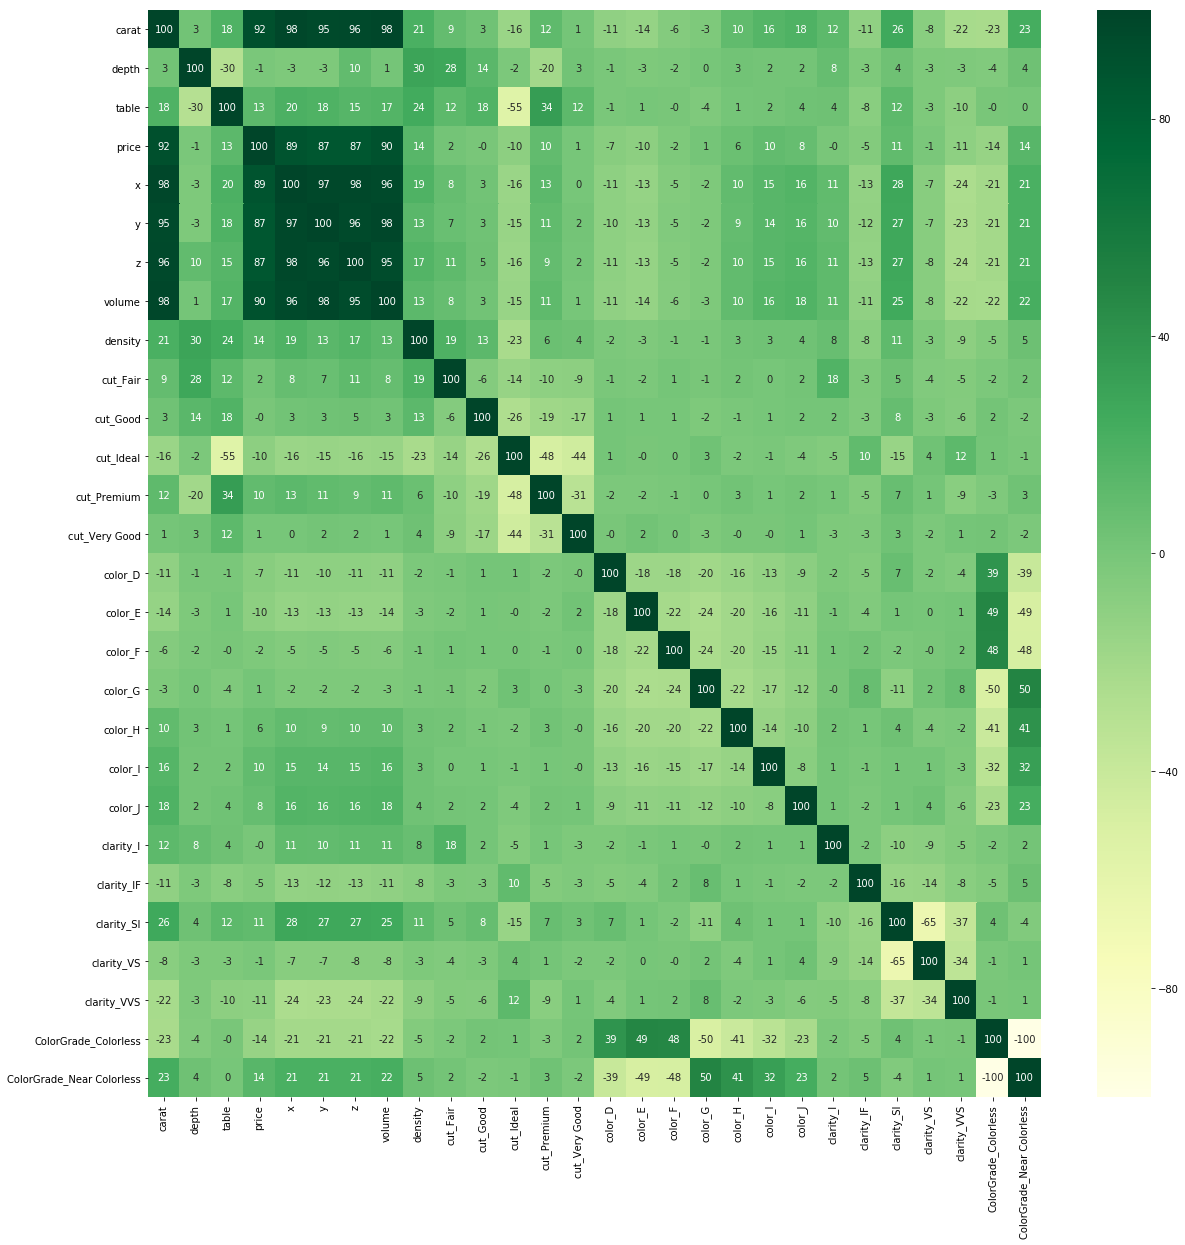

In [31]:
plt.figure(figsize=(20, 20))
corr = new_df.corr()
sns.heatmap(corr*100, cmap="YlGn", annot= True, fmt=".0f")

### Exporting the file

In [32]:
df.to_csv("cleaned.csv", index= False)

## Price Regression

In [33]:
df = pd.get_dummies(df)

In [34]:
df.head()

,carat,depth,table,price,x,y,z,volume,density,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I,clarity_IF,clarity_SI,clarity_VS,clarity_VVS,ColorGrade_Colorless,ColorGrade_Near Colorless
1,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.001204,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.001217,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.001208,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.001241,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.001194,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [35]:
X = df.drop(["price"], axis= 1)

In [36]:
y = df.price

### Importing tools for regression

In [37]:
#Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#Building everything
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Saving the model
import pickle

### Splitting the dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)

In [39]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

43136 10784 43136 10784


In [40]:
X_train.shape, y_train.shape

((43136, 27), (43136,))

### Creating Model pipelines

In [41]:
pipelines = {
    "rf": make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    "gb": make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

### Hyper parameter grid for all the models

In [42]:
rf_hyperparameters = {
    "randomforestregressor__n_estimators": [100, 200],
    "randomforestregressor__max_features": ["auto", "sqrt", 0.33]
}
gb_hyperparameters = {
    "gradientboostingregressor__n_estimators": [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}
hyperparameters = {"rf": rf_hyperparameters,
                   "gb": gb_hyperparameters}

### Fitting the models to the training set

In [43]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1, verbose= 10)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed:  4.3min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed:  4.8min remaining:   51.0s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  4.9min remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.0min finished


rf has been fitted.
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 176 out of 180 | elapsed:  5.4min remaining:    7.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.4min finished


gb has been fitted.


#### Each model's best r2 score on the training set

In [44]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

rf 0.9744573820321644
gb 0.9745284458239208


#### Each model's scores on the test set

In [45]:
for name, model in fitted_models.items():
    print(name)
    print("-----------")
    pred = model.predict(X_test)
    print('MAE:', mean_absolute_error(y_test, pred))
    print("MSE:", "\n", mean_squared_error(y_test, pred))
    
print(np.mean(y_test))

rf
-----------
MAE: 313.6192547800092
MSE: 
 354049.74156468717
gb
-----------
MAE: 327.2584394363897
MSE: 
 352205.77589078987
3861.6685830860533


### Plotting the results

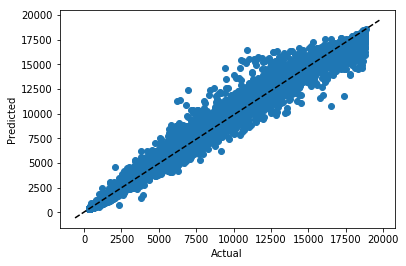

In [46]:
plt.scatter(y, fitted_models["rf"].predict(X))
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "k--")
plt.show()

### Saving the best model

In [47]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

# Finished!